Movie Ratings Analytics 

In [2]:
import pandas as pd 
import os 

In [3]:
os.getcwd()

'/Users/mk/Files/Courses/python_a_Z/Jupyter Notebooks Examples'

In [4]:
movies = pd.read_csv('/Users/mk/Files/Courses/python_a_Z/P4-Movie-Ratings.csv')

In [5]:
movies.head()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [6]:
len(movies)

559

In [7]:
movies.columns

Index(['Film', 'Genre', 'Rotten Tomatoes Ratings %', 'Audience Ratings %',
       'Budget (million $)', 'Year of release'],
      dtype='object')

In [8]:
#change column names
movies.columns=['Film', 'Genre','CriticRating','AudienceRating',\
                'BudgetMillions', 'Year']

In [9]:
movies.head()

,Film,Genre,CriticRating,AudienceRating,BudgetMillions,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [10]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Film            559 non-null    object
 1   Genre           559 non-null    object
 2   CriticRating    559 non-null    int64 
 3   AudienceRating  559 non-null    int64 
 4   BudgetMillions  559 non-null    int64 
 5   Year            559 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


In [11]:
movies.describe()
#year does not make sense as an numeric 

,CriticRating,AudienceRating,BudgetMillions,Year
count,559.000000,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136,2009.152057
std,26.413091,16.826887,48.731817,1.362632
min,0.000000,0.000000,0.000000,2007.000000
25%,25.000000,47.000000,20.000000,2008.000000
50%,46.000000,58.000000,35.000000,2009.000000
75%,70.000000,72.000000,65.000000,2010.000000
max,97.000000,96.000000,300.000000,2011.000000


In [12]:
#convert variables into categorical variables 

In [13]:
movies['Film']= movies['Film'].astype('category')
movies['Genre']= movies['Genre'].astype('category')
movies['Year']= movies['Year'].astype('category')

In [14]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Film            559 non-null    category
 1   Genre           559 non-null    category
 2   CriticRating    559 non-null    int64   
 3   AudienceRating  559 non-null    int64   
 4   BudgetMillions  559 non-null    int64   
 5   Year            559 non-null    category
dtypes: category(3), int64(3)
memory usage: 36.5 KB


In [15]:
#what are the categories within genre
movies['Genre'].cat.categories

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

In [16]:
movies['Genre'].unique

<bound method Series.unique of 0         Comedy
1      Adventure
2         Action
3      Adventure
4         Comedy
         ...    
554       Comedy
555       Comedy
556     Thriller
557       Action
558       Comedy
Name: Genre, Length: 559, dtype: category
Categories (7, object): ['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance', 'Thriller']>

In [17]:
movies.describe()

,CriticRating,AudienceRating,BudgetMillions
count,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136
std,26.413091,16.826887,48.731817
min,0.000000,0.000000,0.000000
25%,25.000000,47.000000,20.000000
50%,46.000000,58.000000,35.000000
75%,70.000000,72.000000,65.000000
max,97.000000,96.000000,300.000000


In [18]:
from matplotlib import pyplot as plt
import seaborn as sns 
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

In [19]:
#JointPlot

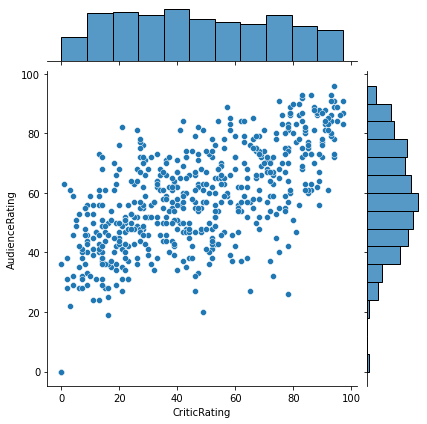

In [20]:
f = sns.jointplot(data=movies, x='CriticRating', y='AudienceRating' )
#basically scatter plot between audience and critic rating
#also have distributions 
#critic rating is more uniform whil audience rating is more normal

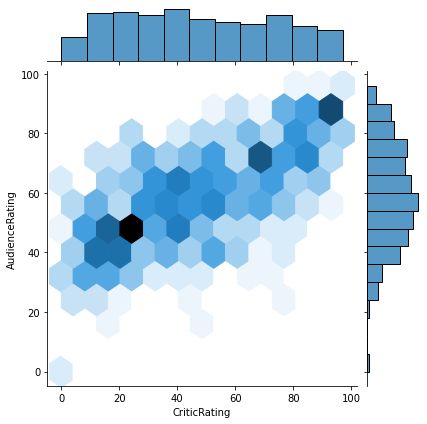

In [21]:
f = sns.jointplot(data=movies, x='CriticRating', y='AudienceRating',kind ='hex')

In [22]:
#allows you to see clusters

In [23]:
#histogram 

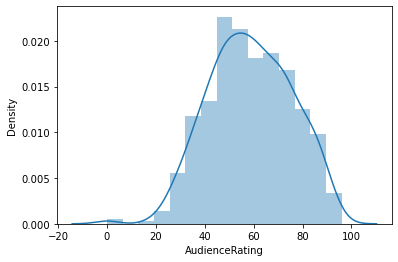

In [24]:
m1 = sns.distplot(movies['AudienceRating'], bins=15)

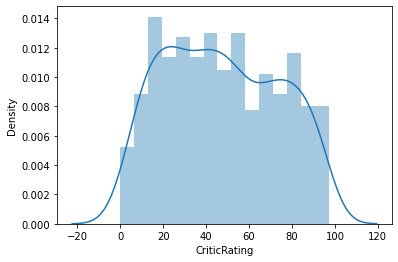

In [25]:
m1 = sns.distplot(movies['CriticRating'], bins=15)

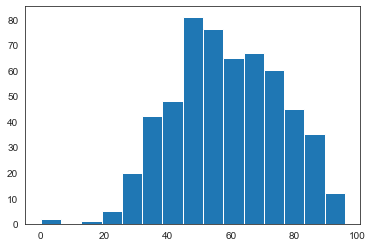

In [26]:
sns.set_style('white')
n1 =plt.hist(movies['AudienceRating'], bins=15)
#without seaborn 
#looks more like a bell curve

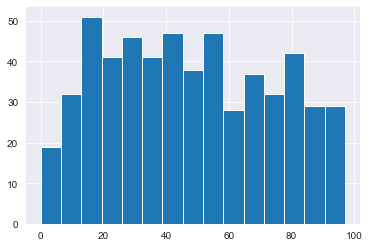

In [27]:
sns.set_style('darkgrid')
n1 =plt.hist(movies['CriticRating'], bins=15)
#without seaborn 
#more uniformly distributed 
#critics behave in a different way 

In [28]:
#stacked Histograms

In [29]:
movies[movies['Genre']=='Drama']['BudgetMillions']

10     30
11     20
13      7
18      8
23     20
       ..
529    66
532    38
534    21
541    15
545     2
Name: BudgetMillions, Length: 101, dtype: int64

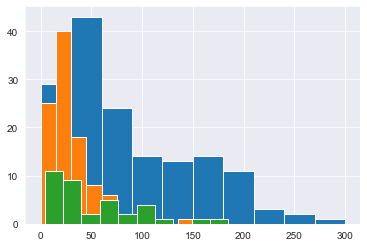

In [30]:
movies['Genre']=='Drama'
plt.hist(movies[movies['Genre']=='Action']['BudgetMillions'], bins =10)
plt.hist(movies[movies['Genre']=='Drama']['BudgetMillions'], bins =10)
plt.hist(movies[movies['Genre']=='Thriller']['BudgetMillions'], bins =10)
plt.show()

(array([[ 9., 39., 24., 13., 16.,  9.,  8., 14.,  5.,  4.,  8.,  2.,  2.,
          0.,  1.],
        [48., 80., 35., 19., 18., 10.,  8., 15.,  5.,  4.,  8.,  2.,  2.,
          0.,  1.],
        [52., 94., 39., 24., 20., 14.,  9., 16.,  5.,  5.,  8.,  2.,  2.,
          0.,  1.]]),
 array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180., 200.,
        220., 240., 260., 280., 300.]),
 <a list of 3 BarContainer objects>)

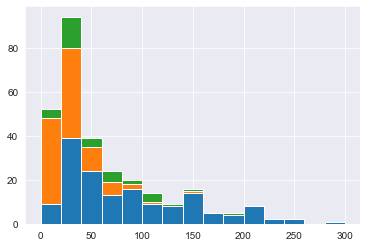

In [31]:
plt.hist([movies[movies['Genre']=='Action']['BudgetMillions'],\
          movies[movies['Genre']=='Drama']['BudgetMillions'],\
        movies[movies['Genre']=='Thriller']['BudgetMillions']],
         bins=15, stacked=True)

In [32]:
#can use loops to automate this for us 

In [33]:
for gen in movies['Genre'].cat.categories:
    print(gen)

Action
Adventure
Comedy
Drama
Horror
Romance
Thriller


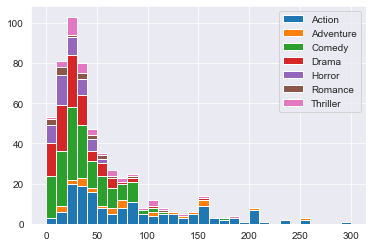

In [34]:
##STACKED HISTOGRAM
list1 =list()
mylabels=list()
for gen in movies['Genre'].cat.categories:
    list1.append(movies[movies['Genre']==gen]['BudgetMillions'])
    mylabels.append(gen)
h=plt.hist(list1, bins=30, stacked=True, rwidth=1,label=mylabels)
plt.legend()
plt.show()

findfont: Font family ['Console'] not found. Falling back to DejaVu Sans.


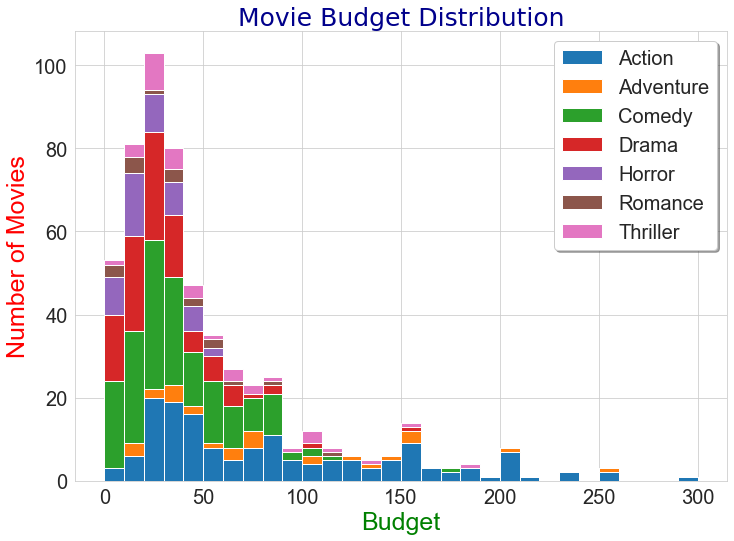

In [35]:
##Final Touches on Chart -- 
##STACKED HISTOGRAM
list1 =list()
mylabels=list()
for gen in movies['Genre'].cat.categories:
    list1.append(movies[movies['Genre']==gen]['BudgetMillions'])
    mylabels.append(gen)

sns.set_style("whitegrid")
fig,ax =plt.subplots()
fig.set_size_inches(11.7,8.27)
h=plt.hist(list1, bins=30, stacked=True, rwidth=1,label=mylabels)
plt.title("Movie Budget Distribution", fontsize=25, \
         color="DarkBlue", fontname='Console')
plt.ylabel("Number of Movies", fontsize=25, color="Red")
plt.xlabel("Budget",fontsize=25, color='Green')
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.legend(frameon=True, fancybox=True, shadow=True, prop={'size':20},\
          framealpha=1)
plt.show()

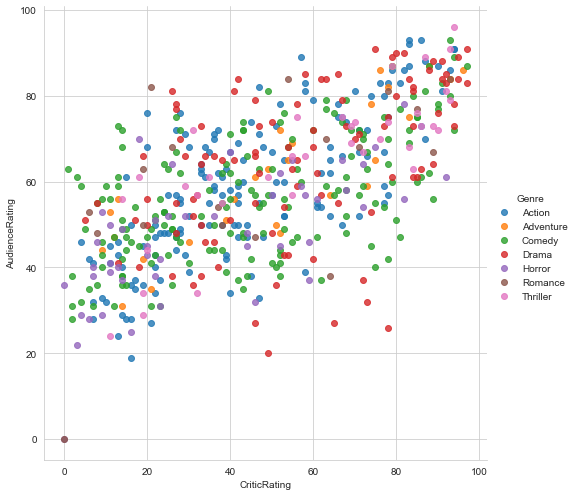

In [36]:
vis1 =sns.lmplot(data=movies, x='CriticRating', y='AudienceRating',\
                fit_reg=False, hue='Genre',\
                size=7, aspect=1)

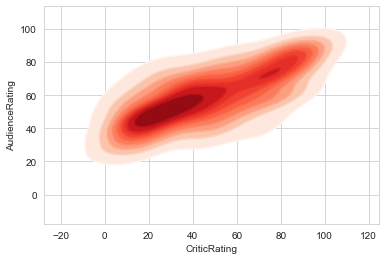

In [37]:
#KDE Plot
k1 = sns.kdeplot(movies['CriticRating'], movies['AudienceRating'], \
                shade=True , shade_lowest=False, cmap='Reds')

#Tip: 
k1b = sns.kdeplot(movies['CriticRating'], movies['AudienceRating'], \
                 cmap='Reds')


In [38]:
#working with subplots

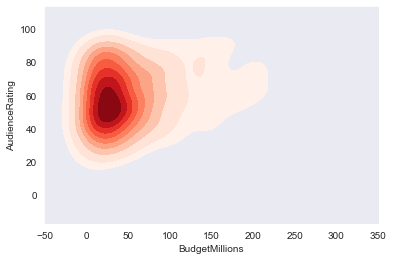

In [39]:
#KDE Plot
sns.set_style('dark')
k2 = sns.kdeplot(movies['BudgetMillions'], movies['AudienceRating'], \
                shade=True , shade_lowest=False, cmap='Reds')


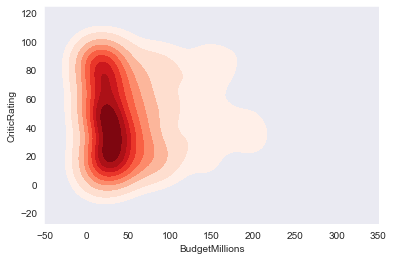

In [40]:
#KDE Plot
sns.set_style('dark')
k3 = sns.kdeplot(movies['BudgetMillions'], movies['CriticRating'], \
                shade=True , shade_lowest=False, cmap='Reds')


[(-20.0, 160.0)]

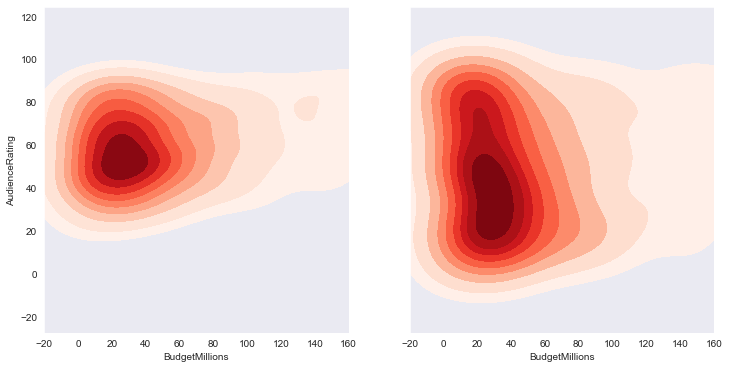

In [41]:
f, axes =plt.subplots(1,2, figsize=(12,6),sharex=True, sharey=True)
k2 = sns.kdeplot(movies['BudgetMillions'], movies['AudienceRating'], \
                shade=True , shade_lowest=False, cmap='Reds', ax=axes[0])
k3 = sns.kdeplot(movies['BudgetMillions'], movies['CriticRating'], \
                shade=True , shade_lowest=False, cmap='Reds',ax=axes[1])

k2.set(xlim=(-20,160))

In [42]:
axes

array([<AxesSubplot:xlabel='BudgetMillions', ylabel='AudienceRating'>,
       <AxesSubplot:xlabel='BudgetMillions', ylabel='CriticRating'>],
      dtype=object)

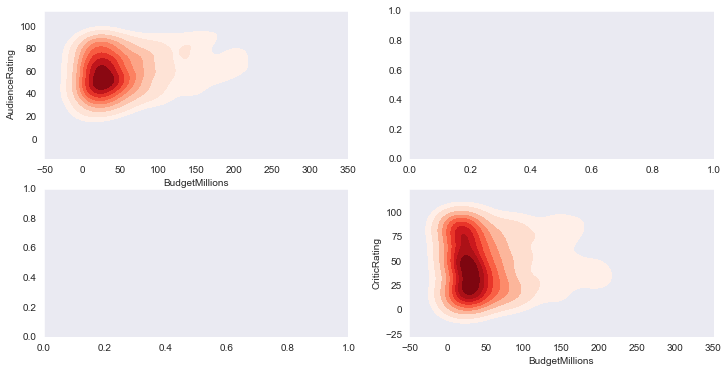

In [43]:
f, axes =plt.subplots(2,2, figsize=(12,6))
k2 = sns.kdeplot(movies['BudgetMillions'], movies['AudienceRating'], \
                shade=True , shade_lowest=False, cmap='Reds', ax=axes[0,0])
k3 = sns.kdeplot(movies['BudgetMillions'], movies['CriticRating'], \
                shade=True , shade_lowest=False, cmap='Reds',ax=axes[1,1])


In [44]:
#violin vs Boxplots

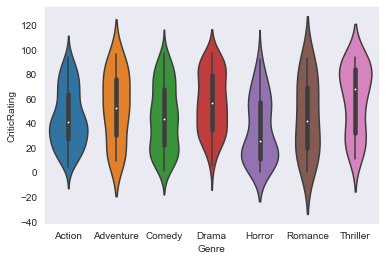

In [45]:
z=sns.violinplot(data=movies, x='Genre', y = 'CriticRating')


<AxesSubplot:xlabel='Genre', ylabel='CriticRating'>

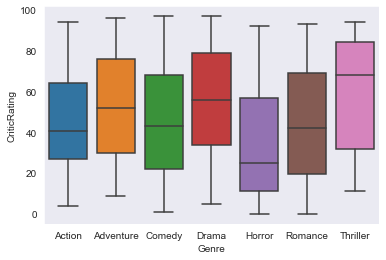

In [46]:
sns.boxplot(data=movies, x='Genre', y = 'CriticRating')

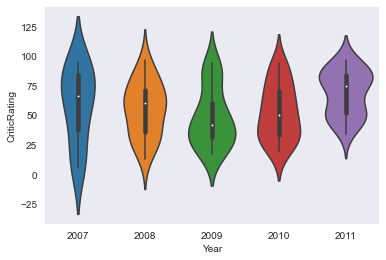

In [47]:
v1 = sns.violinplot(data= movies[movies['Genre']=='Drama'], x='Year', y = 'CriticRating')

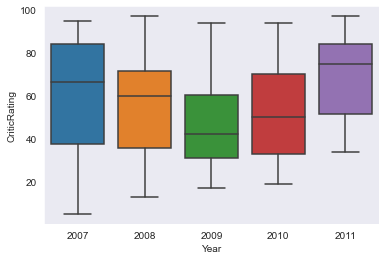

In [48]:
v2 = sns.boxplot(data= movies[movies['Genre']=='Drama'], x='Year', y = 'CriticRating')

#Facet Grids

In [49]:
movies.head()

,Film,Genre,CriticRating,AudienceRating,BudgetMillions,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


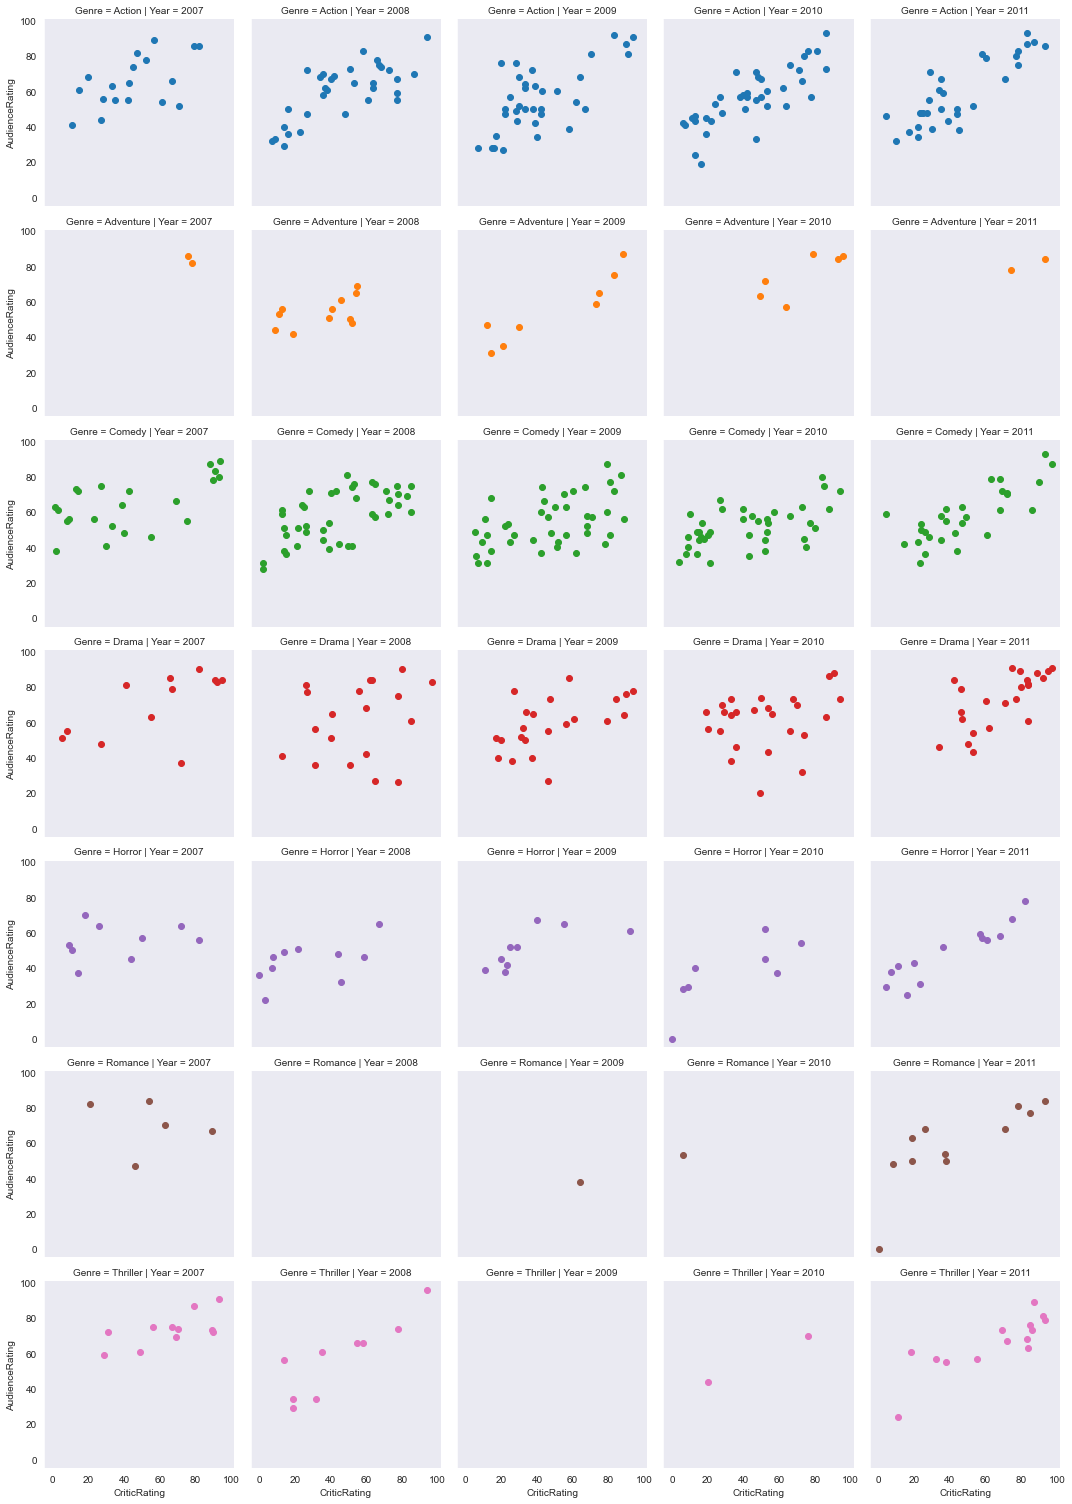

In [50]:
g = sns.FacetGrid(movies, row='Genre',col= 'Year',hue ='Genre')
g=g.map(plt.scatter,'CriticRating', 'AudienceRating')


In [51]:
#can populate with any type of chart 

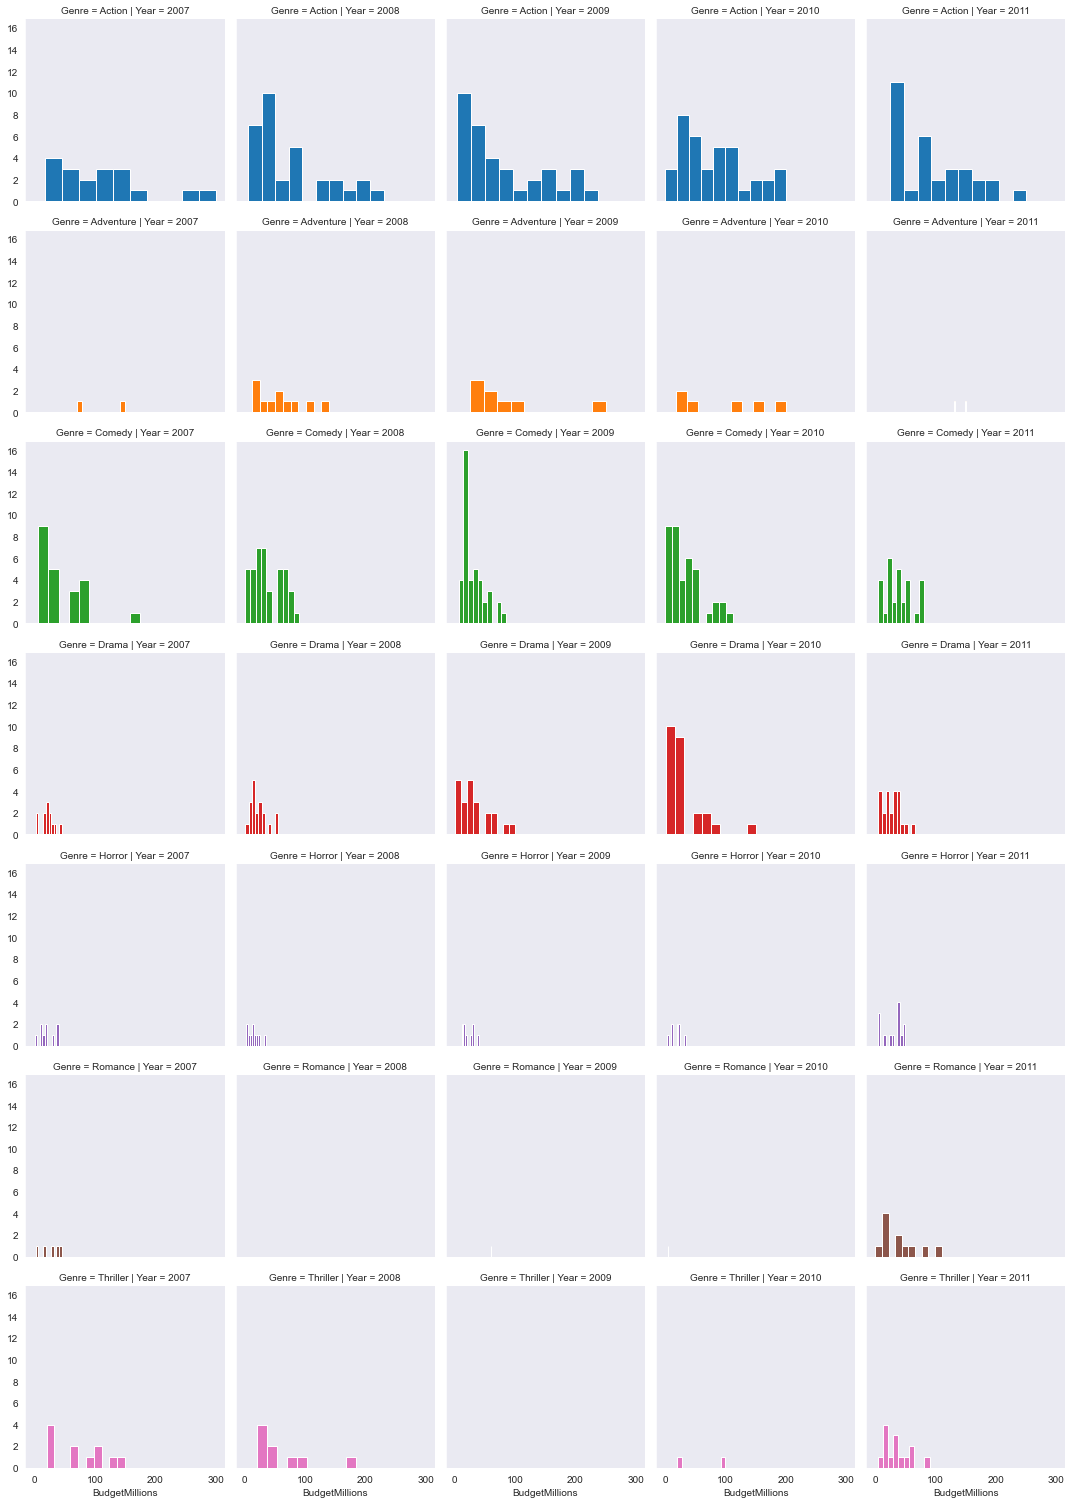

In [52]:
g = sns.FacetGrid(movies, row='Genre',col= 'Year',hue ='Genre')
g=g.map(plt.hist, 'BudgetMillions')

In [53]:
#key word arguments 

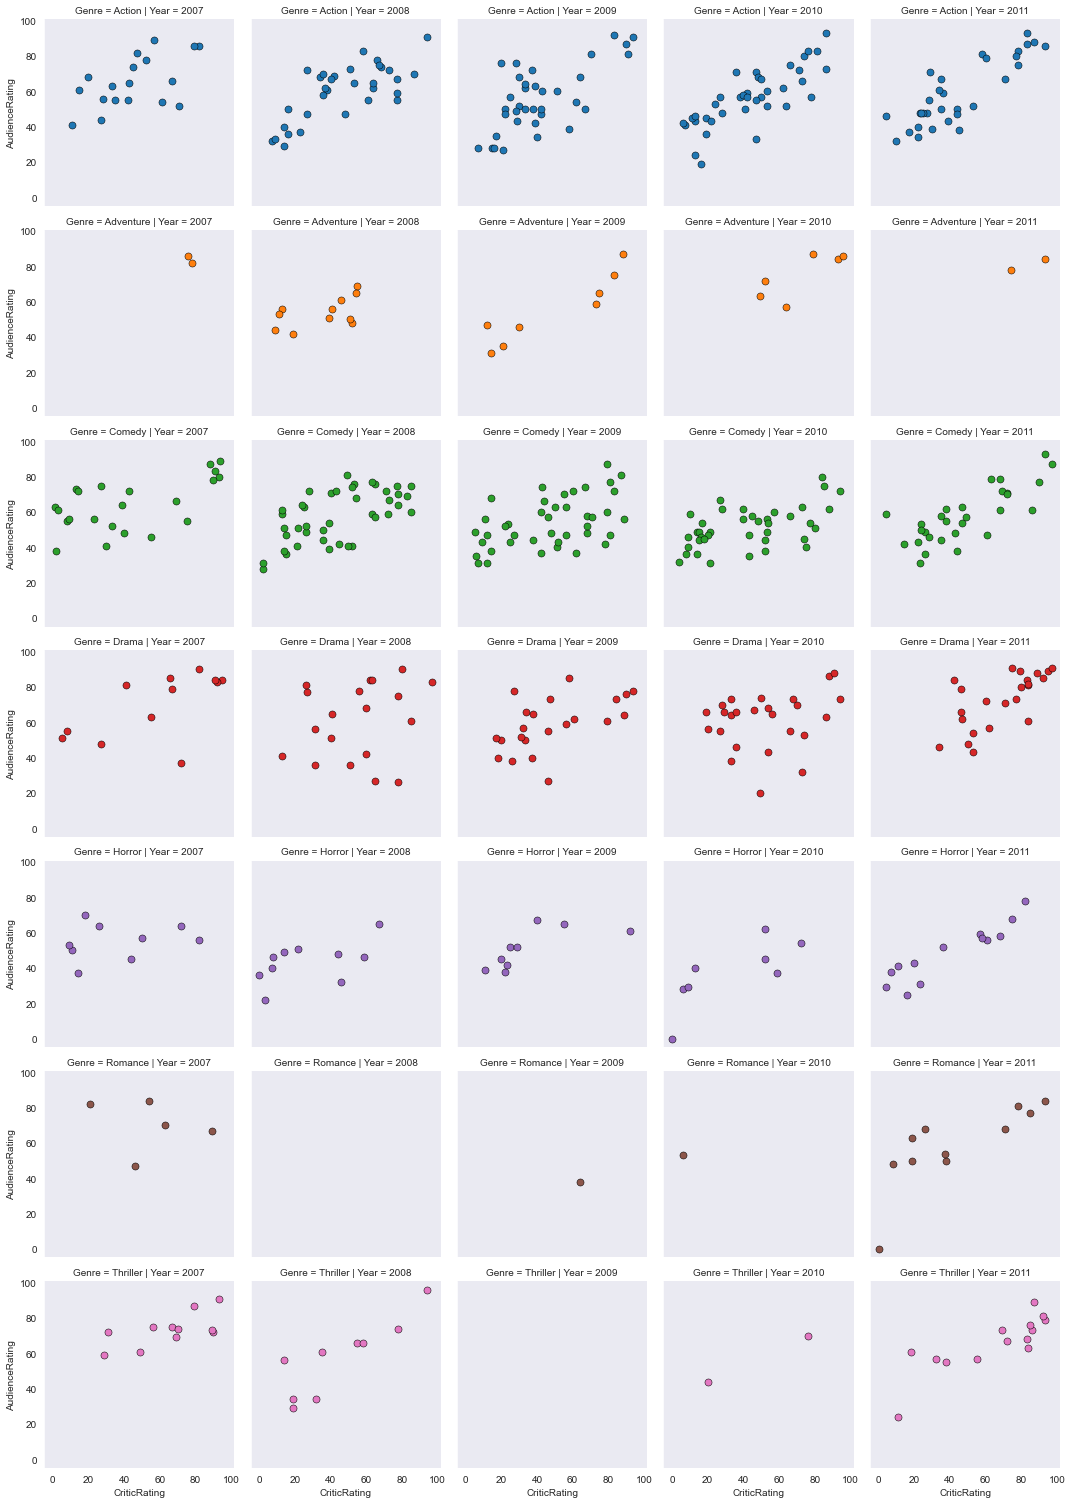

In [54]:
g = sns.FacetGrid(movies, row='Genre',col= 'Year',hue ='Genre')
kws= dict(s=50, linewidth=0.5, edgecolor='black')
g=g.map(plt.scatter,'CriticRating', 'AudienceRating',**kws)

In [55]:
#coordinates and diagnols 

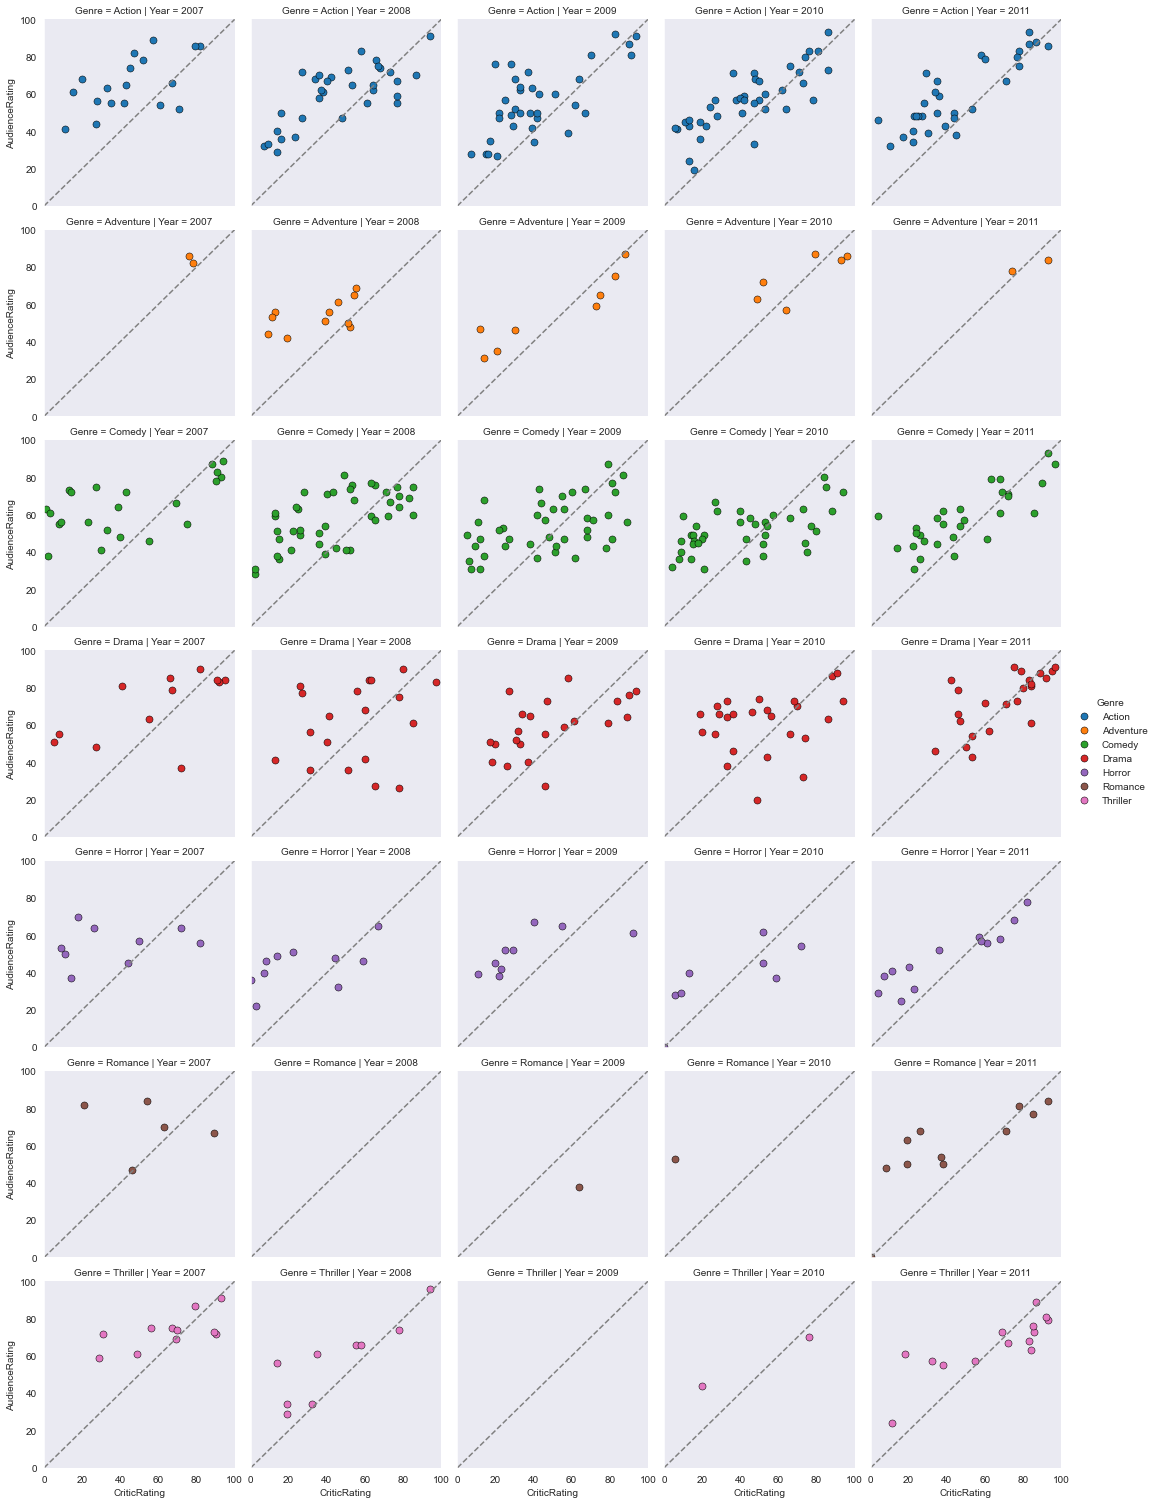

In [56]:
#controlling axes and Adding Diagnols
g = sns.FacetGrid(movies, row='Genre',col= 'Year',hue ='Genre')
kws= dict(s=50, linewidth=0.5, edgecolor='black')
g=g.map(plt.scatter,'CriticRating', 'AudienceRating',**kws)
g.set(xlim=(0,100),ylim=(0,100))
for ax in g.axes.flat:
    ax.plot((0,100),(0,100), c="gray", ls="--")
g.add_legend()

##BONUS: BUILDING DASHBOARD IN PYTHON

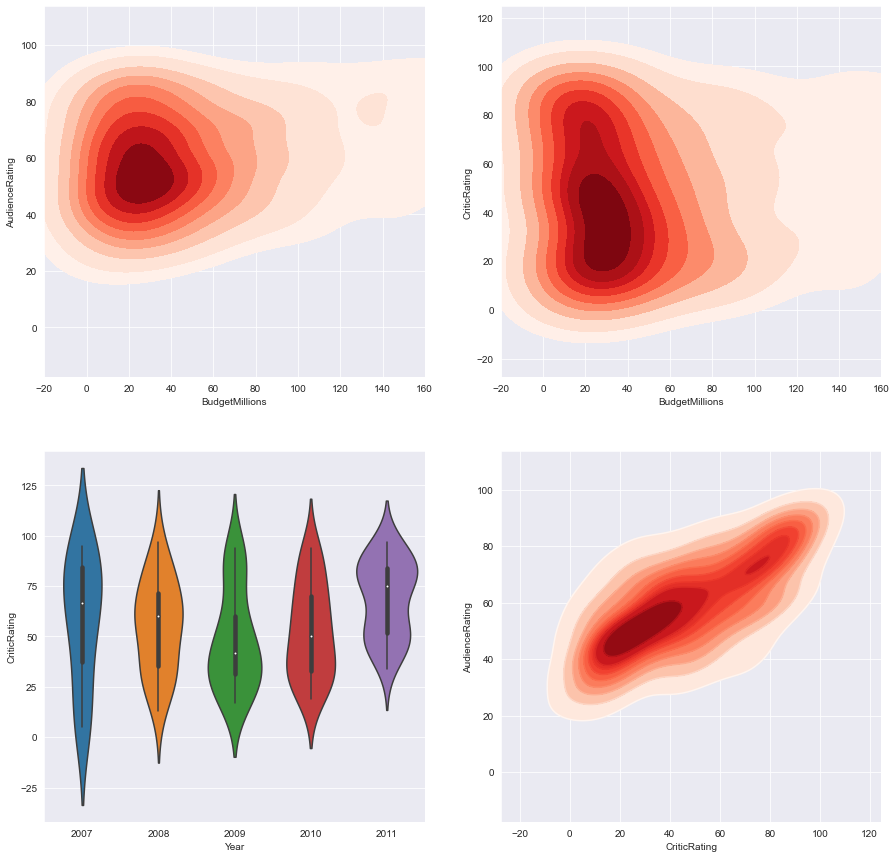

In [57]:
sns.set_style("darkgrid")
f,axes = plt.subplots(2,2, figsize=(15,15))
k1 = sns.kdeplot(movies['BudgetMillions'], movies['AudienceRating'], \
                shade=True , shade_lowest=False, cmap='Reds', ax=axes[0,0])
k2 = sns.kdeplot(movies['BudgetMillions'], movies['CriticRating'], \
                shade=True , shade_lowest=False, cmap='Reds',ax=axes[0,1])

v1 = sns.violinplot(data= movies[movies['Genre']=='Drama'], x='Year', y = 'CriticRating'\
                   ,ax=axes[1,0])

#KDE Plot
k4 = sns.kdeplot(movies['CriticRating'], movies['AudienceRating'], \
                shade=True , shade_lowest=False, cmap='Reds',\
                ax=axes[1,1])
k4b = sns.kdeplot(movies['CriticRating'], movies['AudienceRating'], \
                 cmap='Reds',ax=axes[1,1])

k1.set(xlim=(-20,160))
k2.set(xlim=(-20,160))
plt.show()

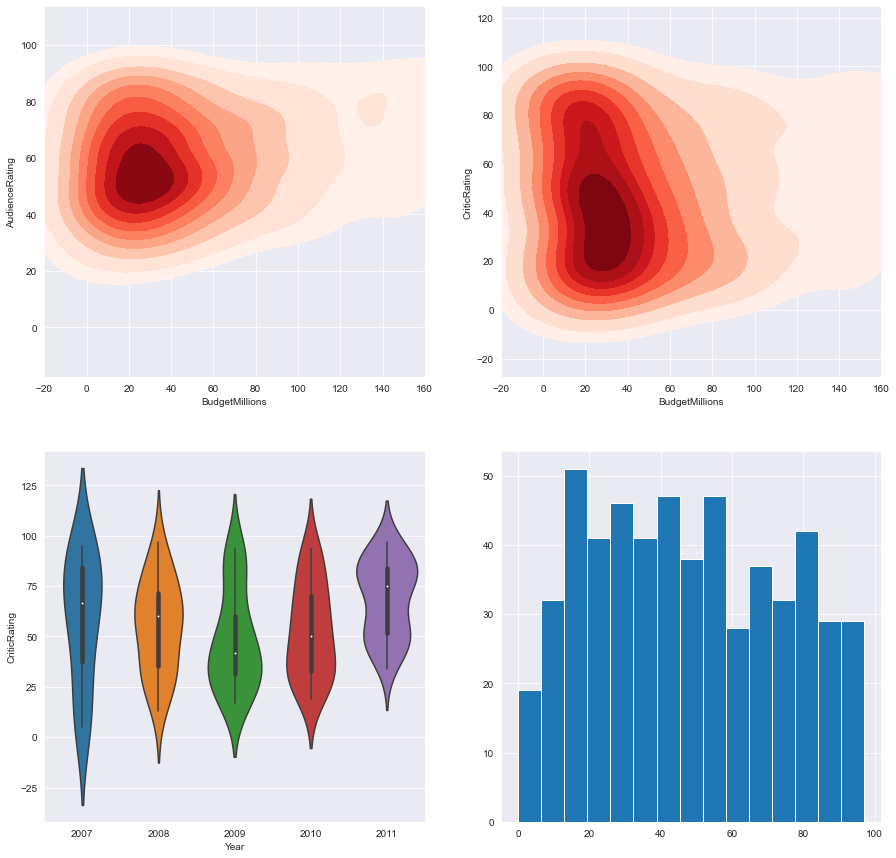

In [58]:
#adding chart that is not SNS 

sns.set_style("darkgrid")
f,axes = plt.subplots(2,2, figsize=(15,15))
k1 = sns.kdeplot(movies['BudgetMillions'], movies['AudienceRating'], \
                shade=True , shade_lowest=False, cmap='Reds', ax=axes[0,0])
k2 = sns.kdeplot(movies['BudgetMillions'], movies['CriticRating'], \
                shade=True , shade_lowest=False, cmap='Reds',ax=axes[0,1])

v1 = sns.violinplot(data= movies[movies['Genre']=='Drama'], x='Year', y = 'CriticRating'\
                   ,ax=axes[1,0])

#KDE Plot
#k4 = sns.kdeplot(movies['CriticRating'], movies['AudienceRating'], \
                #shade=True , shade_lowest=False, cmap='Reds',\
               # ax=axes[1,1])
#k4b = sns.kdeplot(movies['CriticRating'], movies['AudienceRating'], \
                 #cmap='Reds',ax=axes[1,1])

axes[1,1].hist(movies['CriticRating'], bins=15)

k1.set(xlim=(-20,160))
k2.set(xlim=(-20,160))
plt.show()



In [59]:
#Styling Dashboards

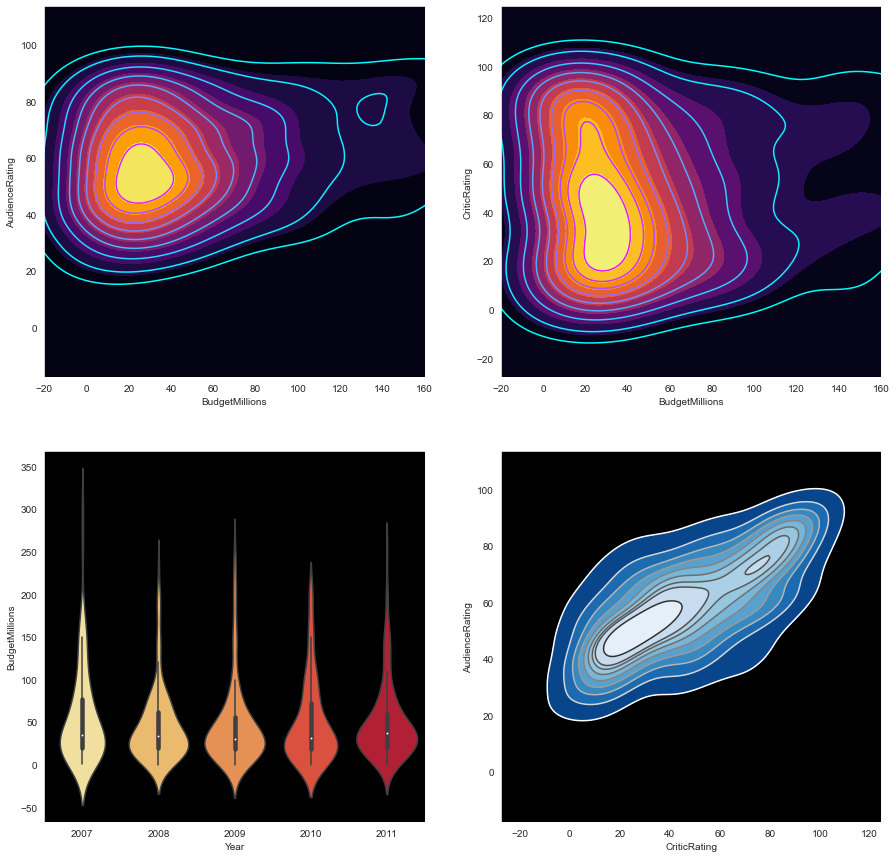

In [60]:
sns.set_style("dark",{"axes.facecolor": "black"}) #white, whitegrid, dark, darkgrid, d
f,axes = plt.subplots(2,2, figsize=(15,15))
#plot 00
k1 = sns.kdeplot(movies['BudgetMillions'], movies['AudienceRating'], \
                shade=True , shade_lowest=True, cmap='inferno', ax=axes[0,0])

#just adds shading
k1b = sns.kdeplot(movies['BudgetMillions'], movies['AudienceRating'], \
                cmap='cool', ax=axes[0,0])

#plot01
k2 = sns.kdeplot(movies['BudgetMillions'], movies['CriticRating'], \
                shade=True , shade_lowest=True, cmap='inferno',ax=axes[0,1])

k2 = sns.kdeplot(movies['BudgetMillions'], movies['CriticRating'], \
                cmap='cool',ax=axes[0,1])


#plot 10
z = sns.violinplot(data= movies, x='Year',\
                  y = 'BudgetMillions', palette='YlOrRd' ,ax=axes[1,0])

#plot 11
k4 = sns.kdeplot(movies['CriticRating'], movies['AudienceRating'], \
                shade=True , shade_lowest=False, cmap='Blues_r',\
                ax=axes[1,1])
k4b = sns.kdeplot(movies['CriticRating'], movies['AudienceRating'], \
                 cmap='gist_gray_r',ax=axes[1,1])





k1.set(xlim=(-20,160))
k2.set(xlim=(-20,160))
plt.show()

In [61]:
##HOMEWORK ASSIGNMENT 



In [62]:
mov=pd.read_csv('/Users/mk/Files/Courses/python_a_Z/P4-Section6-Homework-Dataset.csv', encoding ='latin1')

In [63]:
mov.head(10)

,Day of Week,Director,Genre,Movie Title,Release Date,Studio,Adjusted Gross ($mill),Budget ($mill),Gross ($mill),IMDb Rating,MovieLens Rating,Overseas ($mill),Overseas%,Profit ($mill),Profit%,Runtime (min),US ($mill),Gross % US
0,Friday,Brad Bird,action,Tomorrowland,22/05/2015,Buena Vista Studios,202.1,170.0,202.1,6.7,3.26,111.9,55.4,32.1,18.9,130,90.2,44.6
1,Friday,Scott Waugh,action,Need for Speed,14/03/2014,Buena Vista Studios,204.2,66.0,203.3,6.6,2.97,159.7,78.6,137.3,208.0,132,43.6,21.4
2,Friday,Patrick Hughes,action,The Expendables 3,15/08/2014,Lionsgate,207.1,100.0,206.2,6.1,2.93,166.9,80.9,106.2,106.2,126,39.3,19.1
3,Friday,"Phil Lord, Chris Miller",comedy,21 Jump Street,16/03/2012,Sony,208.8,42.0,201.6,7.2,3.62,63.1,31.3,159.6,380.0,109,138.4,68.7
4,Friday,Roland Emmerich,action,White House Down,28/06/2013,Sony,209.7,150.0,205.4,8.0,3.65,132.3,64.4,55.4,36.9,131,73.1,35.6
5,Friday,David Ayer,action,Fury,17/10/2014,Sony,212.8,80.0,211.8,5.8,2.85,126,59.5,131.8,164.8,134,85.8,40.5
6,Thursday,Rob Marshall,adventure,Into the Woods,25/12/2014,Buena Vista Studios,213.9,50.0,212.9,6.0,3.16,84.9,39.9,162.9,325.8,125,128.0,60.1
7,Friday,Daniel Espinosa,action,Safe House,10/02/2012,Universal,215.5,85.0,208.1,6.8,3.45,81.7,39.3,123.1,144.8,115,126.4,60.7
8,Friday,Gary Shore,action,Dracula Untold,10/10/2014,Universal,216.5,70.0,215.5,6.3,2.92,159.2,73.9,145.5,207.9,92,56.3,26.1
9,Friday,"Henry Joost, Ariel Schulman",horror,Paranormal Activity 3,21/10/2011,Paramount Pictures,218.8,5.0,207,5.9,2.90,103,49.8,202,4040.0,84,104.0,50.2


In [64]:
mov.describe()

,Budget ($mill),IMDb Rating,MovieLens Rating,Overseas%,Profit%,Runtime (min),US ($mill),Gross % US
count,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000
mean,92.467928,6.923849,3.340378,57.698849,719.278783,117.781250,167.135197,42.301151
std,59.421407,0.925890,0.454071,12.334237,1942.807248,23.179122,92.465903,12.334237
min,0.600000,3.600000,1.490000,17.200000,7.700000,30.000000,0.000000,0.000000
25%,45.000000,6.375000,3.037500,49.900000,201.850000,100.000000,106.950000,33.700000
50%,80.000000,6.900000,3.365000,58.200000,338.550000,116.000000,141.700000,41.800000
75%,130.000000,7.600000,3.672500,66.300000,650.100000,130.250000,202.100000,50.100000
max,300.000000,9.200000,4.500000,100.000000,41333.300000,238.000000,760.500000,82.800000


In [65]:
mov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608 entries, 0 to 607
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Day of Week             608 non-null    object 
 1   Director                608 non-null    object 
 2   Genre                   608 non-null    object 
 3   Movie Title             608 non-null    object 
 4   Release Date            608 non-null    object 
 5   Studio                  608 non-null    object 
 6   Adjusted Gross ($mill)  608 non-null    object 
 7   Budget ($mill)          608 non-null    float64
 8   Gross ($mill)           608 non-null    object 
 9   IMDb Rating             608 non-null    float64
 10  MovieLens Rating        608 non-null    float64
 11  Overseas ($mill)        608 non-null    object 
 12  Overseas%               608 non-null    float64
 13  Profit ($mill)          608 non-null    object 
 14  Profit%                 608 non-null    fl

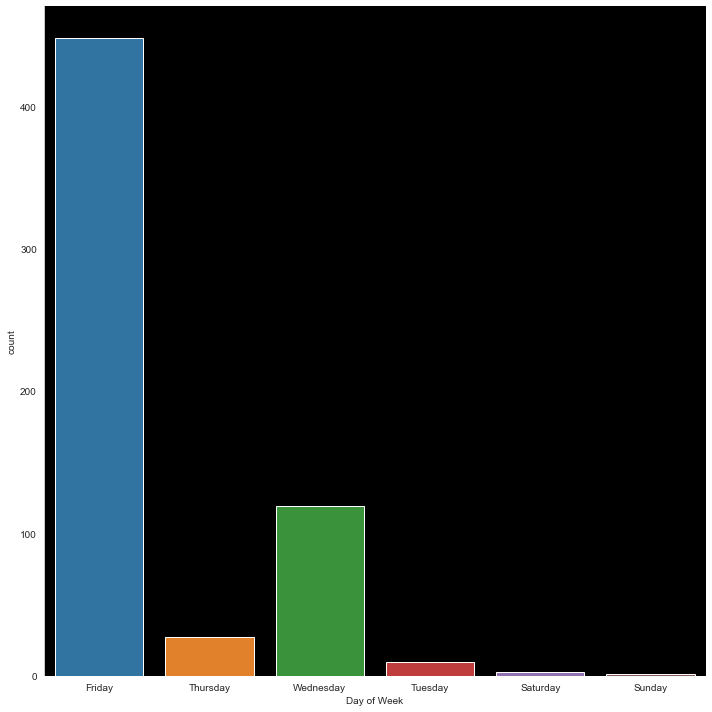

In [66]:
vis1 = sns.factorplot(data=mov, x='Day of Week', kind = 'count', size=10)

In [67]:
mov['Studio'].unique()

array(['Buena Vista Studios', 'Lionsgate', 'Sony', 'Universal',
       'Paramount Pictures', 'WB', 'Weinstein Company',
       'UA Entertainment', 'WB/New Line', 'New Line Cinema', 'Fox',
       'TriStar', 'Relativity Media', 'Screen Gems', 'StudioCanal',
       'Fox Searchlight Pictures', 'MiraMax', 'Path_ Distribution',
       'DreamWorks', 'Lionsgate Films', 'Revolution Studios',
       'Dimension Films', 'USA', 'Lionsgate/Summit',
       'Sony Picture Classics', 'Pacific Data/DreamWorks', 'Disney',
       'Art House Studios', 'Colombia Pictures', 'Gramercy Pictures',
       'Summit Entertainment', 'Vestron Pictures', 'MGM', 'Orion', 'IFC',
       'New Market Films'], dtype=object)

In [68]:
len(mov['Studio'].unique())

36

In [69]:
mov['Genre'].unique()

array(['action', 'comedy', 'adventure', 'horror', 'animation',
       'biography', 'drama', 'musical', 'sci-fi', 'crime', 'romance',
       'fantasy', 'mystery', 'thriller', 'documentary'], dtype=object)

In [74]:
len(mov['Genre'].unique())

15

In [77]:
mov2 = mov[(mov['Studio']== 'Fox') | (mov['Studio']== 'WB')]

In [78]:
mov2['Studio'].unique

<bound method Series.unique of 10      WB
24      WB
27      WB
28     Fox
30     Fox
      ... 
595    Fox
602    Fox
603     WB
604    Fox
605    Fox
Name: Studio, Length: 178, dtype: object>

In [79]:
len(mov2['Studio'].unique())

2

In [80]:
mov2

,Day of Week,Director,Genre,Movie Title,Release Date,Studio,Adjusted Gross ($mill),Budget ($mill),Gross ($mill),IMDb Rating,MovieLens Rating,Overseas ($mill),Overseas%,Profit ($mill),Profit%,Runtime (min),US ($mill),Gross % US
10,Friday,Eric Brevig,animation,Yogi Bear,17/12/2010,WB,219.9,80.0,201.6,4.5,2.17,101.3,50.3,121.6,152.0,80,100.2,49.7
24,Friday,Todd Phillips,comedy,Due Date,5/11/2010,WB,231,65.0,211.8,6.6,3.17,111.2,52.5,146.8,225.9,95,100.5,47.5
27,Friday,Martin Campbell,action,Green Lantern,17/06/2011,WB,232.5,200.0,219.9,5.7,2.87,103.3,47.0,19.9,10.0,114,116.6,53.0
28,Wednesday,Baz Luhrmann,adventure,Australia,26/11/2008,Fox,233.4,78.0,211.3,7.6,3.50,161.8,76.6,133.3,170.9,165,49.6,23.4
30,Friday,Paul Feig,action,The Heat,28/06/2013,Fox,234.7,43.0,229.9,6.6,4.07,70.3,30.6,186.9,434.7,117,159.6,69.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,Wednesday,Irvin Kershner,sci-fi,The Empire Strikes Back,21/05/1980,Fox,"1,553.80",23.0,538.4,8.8,4.18,247.9,46.0,515.4,2240.9,124,290.5,54.0
602,Tuesday,Richard Fleischer,adventure,Doctor Dolittle,19/12/1967,Fox,"2,096.80",70.5,294.5,5.3,3.01,150.3,51.0,224,317.7,152,144.2,49.0
603,Wednesday,William Friedkin,horror,The Exorcist,26/12/1973,WB,"2,363.60",12.0,441.3,6.9,3.39,208.4,47.2,429.3,3577.5,122,232.9,52.8
604,Wednesday,George Lucas,action,Star Wars,25/05/1977,Fox,"3,042.80",11.0,775.4,8.7,4.19,314.4,40.5,764.4,6949.1,121,461.0,59.5


In [81]:
#filter on Studios and Genres 

In [82]:
studio_filters = ['Buena Vista Studios','Fox','Paramount Pictures','Sony','Universal','WB']
mov2= mov[mov["Studio"].isin(studio_filters)]                  

In [83]:
genre_filters = ['action','adventure','animation','comedy','drama']
mov3= mov2[mov2["Genre"].isin(genre_filters)]     

In [84]:
len(mov3["Studio"].unique())

6

In [85]:
len(mov3["Genre"].unique())

5

In [86]:
len(mov3)

423

In [87]:
#Create Viz

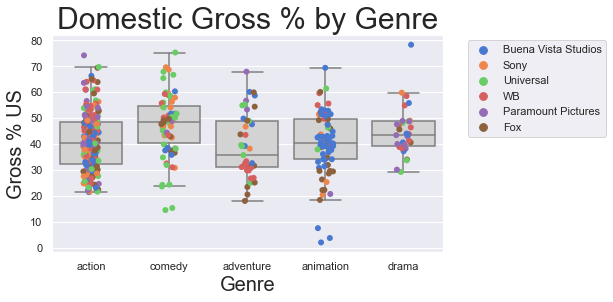

In [104]:
sns.set(style='darkgrid', palette='muted',color_codes=True,)

ax = sns.boxplot(data=mov3, x='Genre', y="Gross % US", orient= 'v', color='lightgray'\
                ,showfliers=False)
plt.setp(ax.artists, alpha=0.5)

sns.stripplot(x='Genre', y='Gross % US', data=mov3, jitter=True, size=6 , linewidth=0, hue="Studio")

ax.axes.set_title("Domestic Gross % by Genre", fontsize =30)
ax.set_xlabel("Genre", fontsize=20)
ax.set_ylabel("Gross % US", fontsize=20)

ax.legend(bbox_to_anchor=(1.05,1), loc=2)
plt.rcParams['figure.figsize'] = 11.7,8.27